HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics


In [6]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge, Lasso


In [12]:
df = pd.read_csv('HR-Emp.csv')


In [13]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
df.isna().any()


Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

there are no null values The dataset has 35 columns in which Attrition is the target variable and rest 34 are Feature variables



In [16]:
df.shape


(1470, 35)

In [17]:
categorial_columns=df.select_dtypes(include=[object])
categorial_columns


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [18]:
df['Attrition'].unique()


array(['Yes', 'No'], dtype=object)

Attrition column has only Yes and No records which tells whether the employee left the company or not



In [19]:
df['BusinessTravel'].unique()


array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

BusinessTravel column has 3 types of records about whether employee travels, not or travels frequently



In [21]:
df['Department'].value_counts()


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

in Department column has the records of only 3 different departments



In [22]:
df['EducationField'].value_counts()


Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

EducationField column gives us details about 6 different education fields of employees



In [23]:
df['Gender'].unique()


array(['Female', 'Male'], dtype=object)

In [24]:
df['JobRole'].value_counts()


Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

JobRole column has 9 different roles of employees working in



In [25]:
df['MaritalStatus'].unique()


array(['Single', 'Married', 'Divorced'], dtype=object)

In [26]:
df['Over18'].unique()


array(['Y'], dtype=object)

We can observe that this column consists of only 1 type of data that tells about employees age group



In [27]:
df['OverTime'].unique()


array(['Yes', 'No'], dtype=object)

OverTime column gives us details about whether the employee works over time or not

From all the 9 columns above we can observe that all the 9 columns are categorical data and can be used to find the relationship with attrition and encoded to build the model


In [28]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

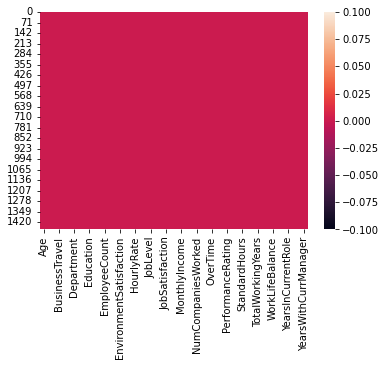

In [29]:
sns.heatmap(df.isnull())


We can observe that there is no missing values present in the data

Let us check for relationship of each column with atrrition column



<AxesSubplot:xlabel='Attrition', ylabel='Count'>

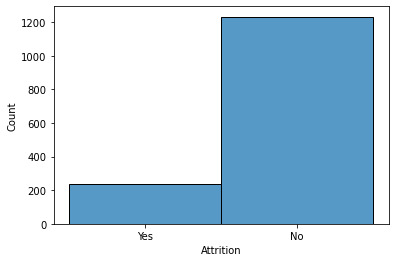

In [31]:
sns.histplot(df['Attrition'])


From the above plot we can observe that the number of employees who left the job is much lesser than employees who didn't leave the job



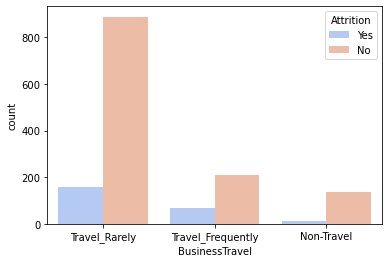

In [32]:
sns.countplot(x='BusinessTravel',hue='Attrition',data=df,palette='coolwarm')
plt.show()


 we can observe that the atrrition is less in case of employees who belong to the Travel_Rarely category than Travel_Frequently and Non_Travel employees

In the similar way we can plot Count plot for all the categorical data and check for relationship with Atrrition



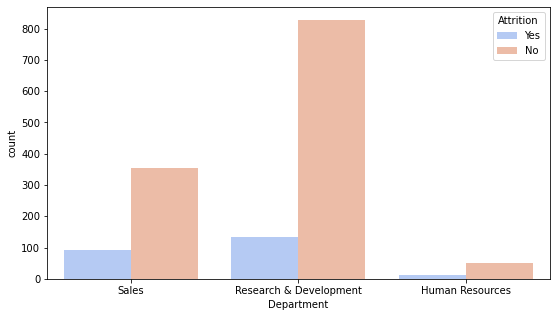

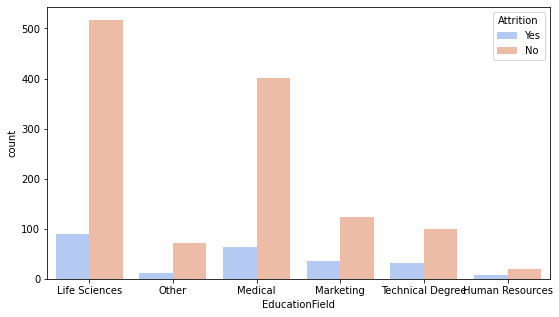

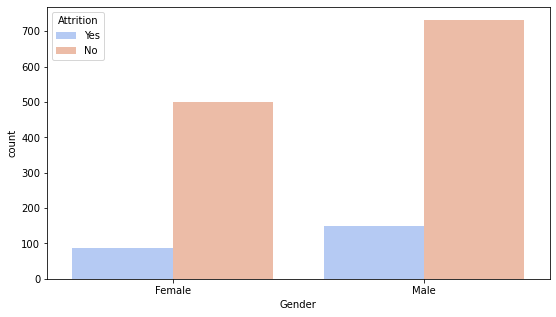

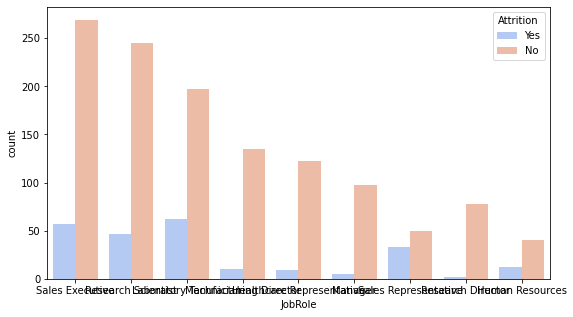

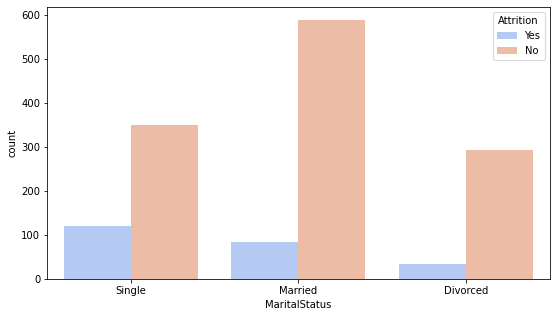

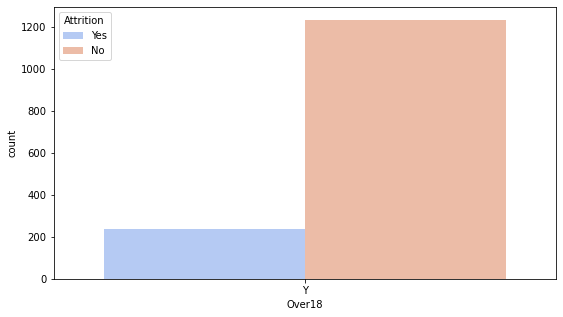

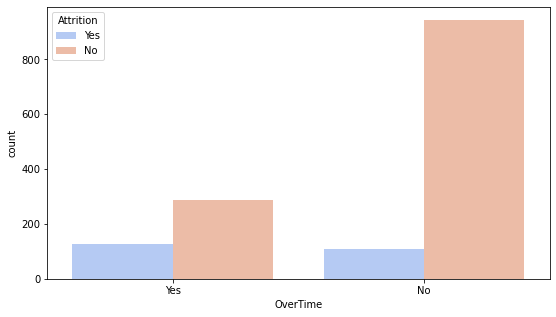

In [33]:
Cat_cols=['Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
for cols in Cat_cols:
    plt.figure(figsize=(9,5))
    sns.countplot(x=cols,hue='Attrition',data=df,palette='coolwarm')
    plt.show()


 Observations:

In Department the attrition is high and less in Research & Development departments compared to other departments as the number of employees are higher in Research & Development department.

In EducationField the attrition is least in Life Science and Medical Feild stand next

Considering gender we can oserve that the attrition is higher in case of Females than that of Males

In the Jobroles data we can observe that the atrrition is least in case of Sales executive roles and the employee size seems to be highest in the same role.

In marital status data we can observe that most of the employees are married and the attrition is less in case of married employees and greater in single category.

In Over18 data we can observe that all the employees belong to Over18 category and we can observe that almost 1200 employees have not left job, only 200 around employees have left job.

In overTime data we can observe that employee atrrition is less in case of employees who doesn't do overtime work


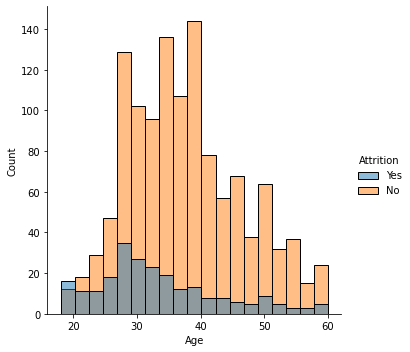

In [34]:
 sns.displot(x='Age',data=df, hue='Attrition')


We can observe that the attrition is less in the age group of 35 to 40

In the similar way we can plot graphs for other numerical data and check their relationship with Atrrition data



In [35]:
num_columns=df.select_dtypes(include=['int64'])
num_columns


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


<Figure size 720x360 with 0 Axes>

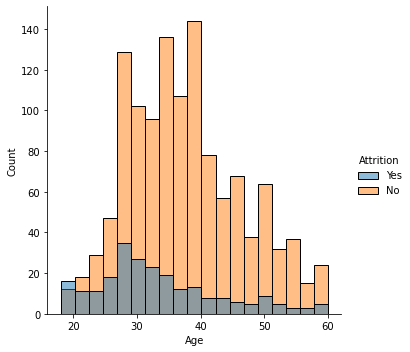

<Figure size 720x360 with 0 Axes>

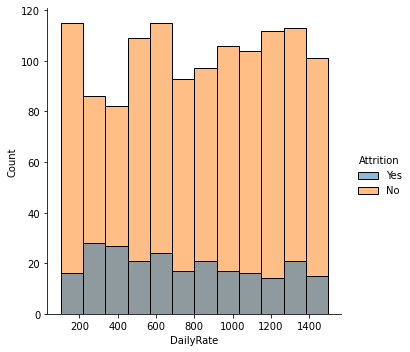

<Figure size 720x360 with 0 Axes>

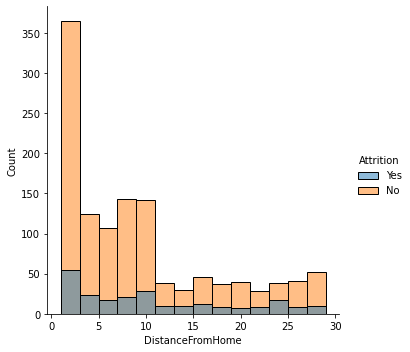

<Figure size 720x360 with 0 Axes>

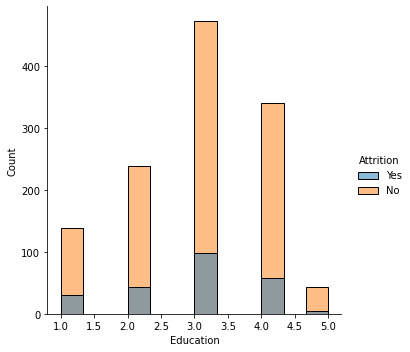

<Figure size 720x360 with 0 Axes>

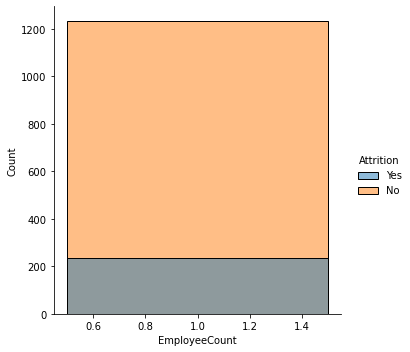

<Figure size 720x360 with 0 Axes>

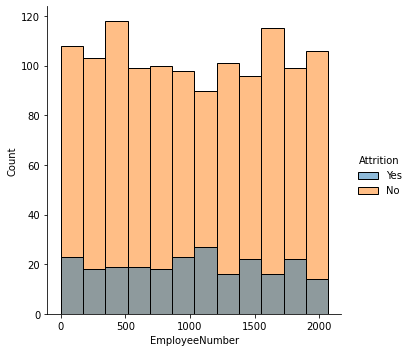

<Figure size 720x360 with 0 Axes>

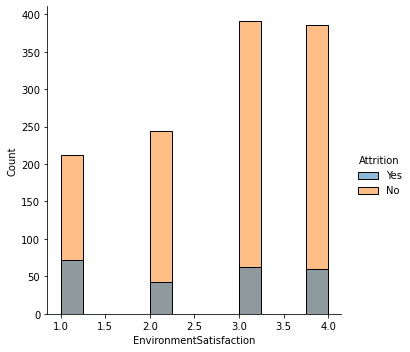

<Figure size 720x360 with 0 Axes>

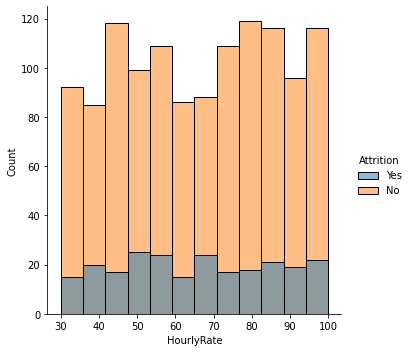

<Figure size 720x360 with 0 Axes>

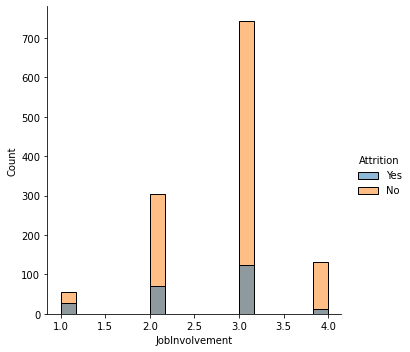

<Figure size 720x360 with 0 Axes>

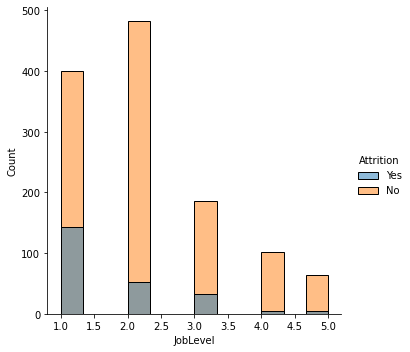

<Figure size 720x360 with 0 Axes>

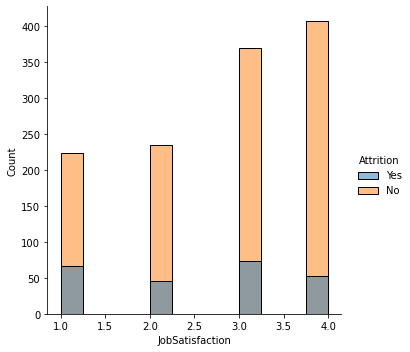

<Figure size 720x360 with 0 Axes>

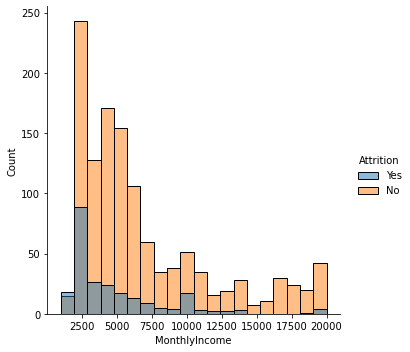

<Figure size 720x360 with 0 Axes>

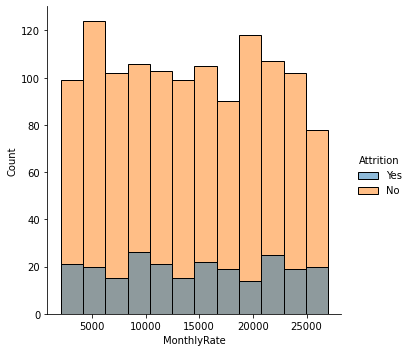

<Figure size 720x360 with 0 Axes>

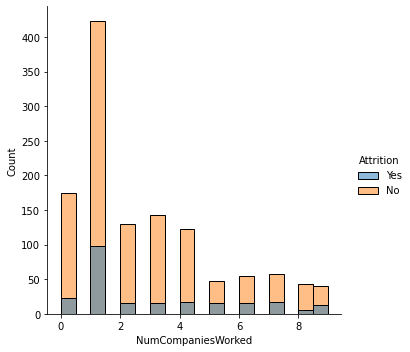

<Figure size 720x360 with 0 Axes>

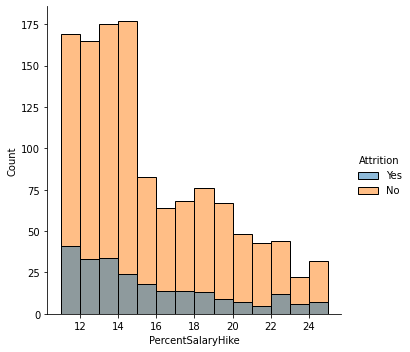

<Figure size 720x360 with 0 Axes>

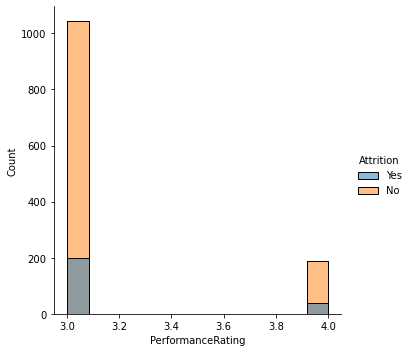

<Figure size 720x360 with 0 Axes>

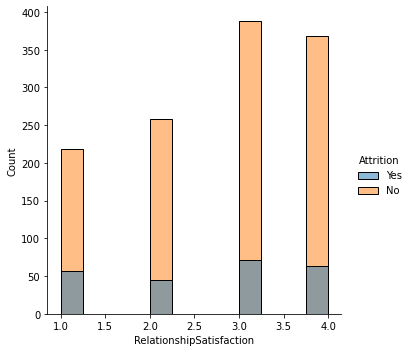

<Figure size 720x360 with 0 Axes>

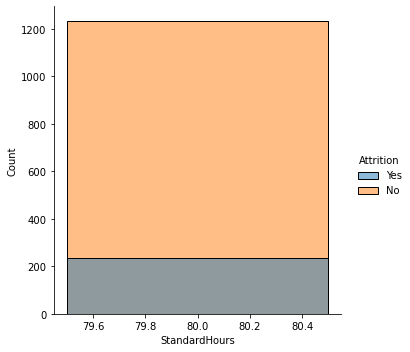

<Figure size 720x360 with 0 Axes>

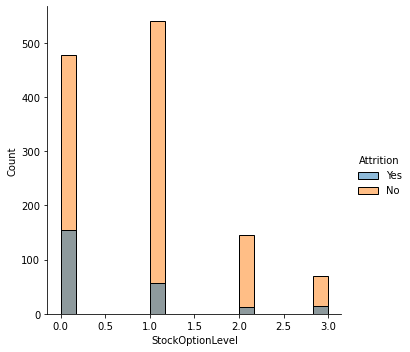

<Figure size 720x360 with 0 Axes>

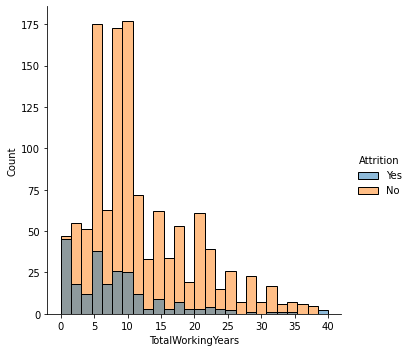

<Figure size 720x360 with 0 Axes>

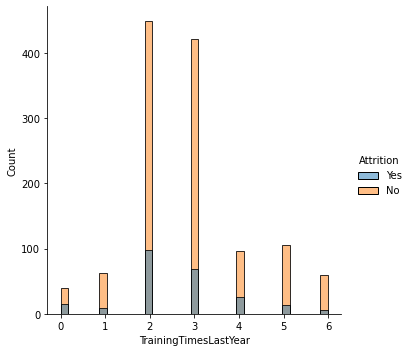

<Figure size 720x360 with 0 Axes>

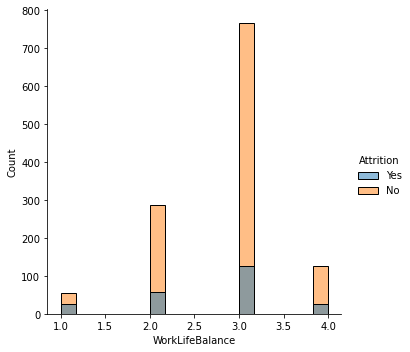

<Figure size 720x360 with 0 Axes>

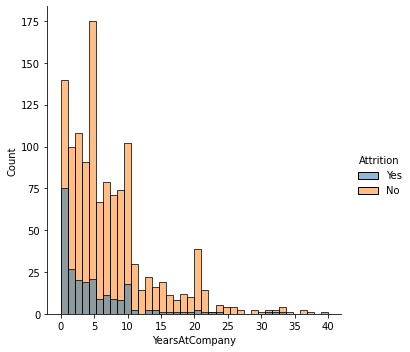

<Figure size 720x360 with 0 Axes>

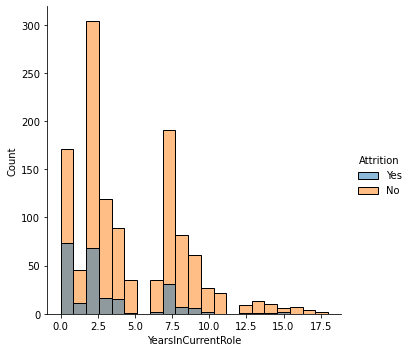

<Figure size 720x360 with 0 Axes>

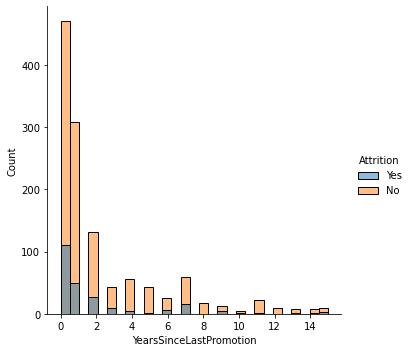

<Figure size 720x360 with 0 Axes>

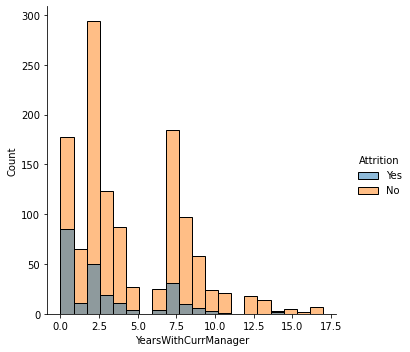

In [36]:
for cols in num_columns:
    plt.figure(figsize=(10,5))
    sns.displot(x=cols,data=df, hue='Attrition')
    plt.show()


from the observation the relationship of each column with atrrition data by the graphgs above

In Daily rate the atrrition is high for those employees who lie between 200 to 400

In DistanceFromHome Vs Atrrition graph we can observe that most of the employees stayed at the within 5kms and the atrrition is less in case of employees who stay near by the workplace

In Education graph most of the employees education is of 3 years and atrrition is less with the employees whose education is 3 years

EmployeeNumber doesn't make any impact on Atrrition data

In Environment satisifaction data most of the employees score is 3 and 4, which inturn tells that atrrition is less with the employess whose score is 3 and 4

In Jobinvolvemnet graph we can see that most of the employees score is 3 which has less attrition

In Joblevel most of the employees stand in 1 and 2 levels, atrrition is less in case of 2nd level emoployess and high in case of 1st level employees

Most of the employees rating for job satisfaction is 4 which has less attrition and atrrition is slightly high with the employees whose rating is 1 and 3

Atrrition is both less and high in case of employees whose monthly income is 2500

Employee count is high for those employees who worked in 1 company and same category has both high and less atrrition

We observe that most of the employees PercentSalaryHike lies between 11 to 15% and employee who have 11% salary hike have high attrition and less attrition is shown by employees whose hike % is 13 to 15%

Most of the employees performance rating is 3 and the same category employees show less atrrition

Most of the employees relationship satisfation score is 3 and 4, The employees who fall under the same category show less attrition

Most of the employees working years is 5 to 10 years, in this category the attrition is less and the employees who belong to 1 working Year category has high attrition

Most of the employees have training time last year as 2 and 3, the same category employees have less attrition

Worklife balance score is 3 for most of the employees, atrrition is both high and less for the same category employees

Majority of the employees survived in the company for 5 years and the same category employees have less attrition, those employees who are in company only for 1 year have high atrrition rate


In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [38]:
#encoding the categorical data
le = LabelEncoder()


In [39]:
categorial_columns=df.select_dtypes(include=[object])
categorial_columns


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [40]:
for columns in categorial_columns:
    df[columns] = le.fit_transform(df[columns])


In [41]:
df.dtypes


Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [42]:
df.describe()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


By comparing mean and meadian descriptions in the above table we can observe that skewness is present in the columns 'Attrition', 'BusinessTravel', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'

Comparing 75th percentile and max values we can observe that outliers are present in the columns 'Attrition', 'MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'


In [43]:
df.corr()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


<AxesSubplot:>

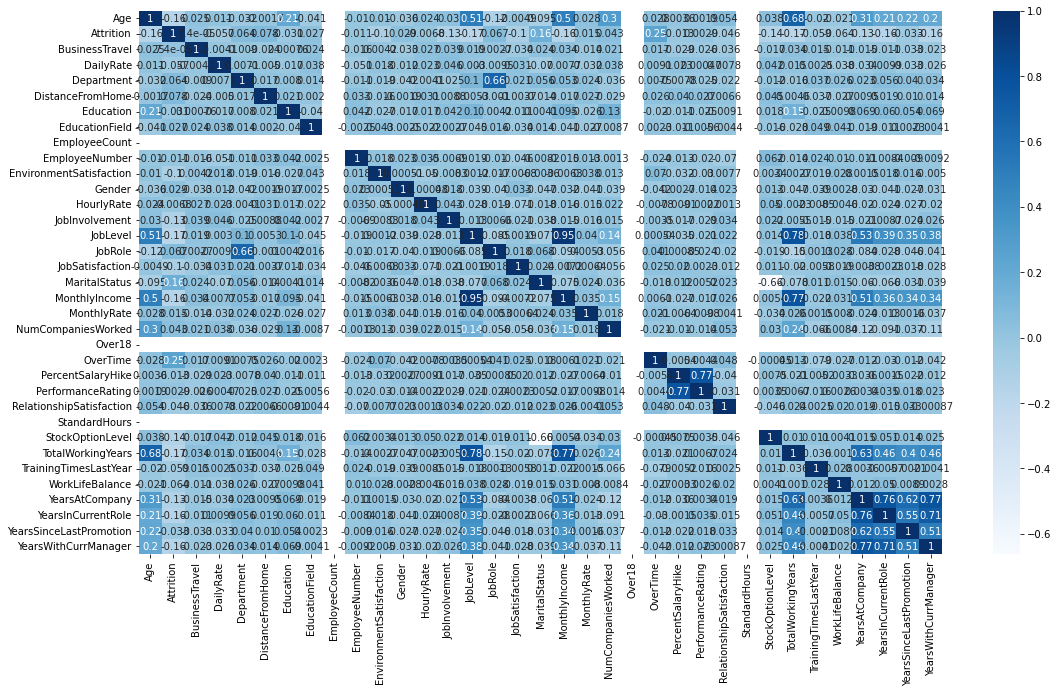

In [44]:
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(),cmap='Blues',annot=True)


From the above plot we can observe that Atrrition has a better correlation with Overtime data compared to others

The columns Year in company and Years in current role has a good correlation

Percent Salary hike and Performance rating has a good correlation


In [45]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

In [46]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')


In [47]:
df[['BusinessTravel','OverTime','PercentSalaryHike', 'PerformanceRating', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']] = scaler.fit_transform(df[['BusinessTravel','OverTime','PercentSalaryHike', 'PerformanceRating', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']].values)


Age                            AxesSubplot(0.125,0.787927;0.133621x0.0920732)
Attrition                   AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
BusinessTravel               AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
DailyRate                   AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
Department                  AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
DistanceFromHome               AxesSubplot(0.125,0.677439;0.133621x0.0920732)
Education                   AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
EducationField               AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
EmployeeCount               AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
EmployeeNumber              AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
EnvironmentSatisfaction        AxesSubplot(0.125,0.566951;0.133621x0.0920732)
Gender                      AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
HourlyRate                   AxesSubplot(0.44569,0.566951;0.1336

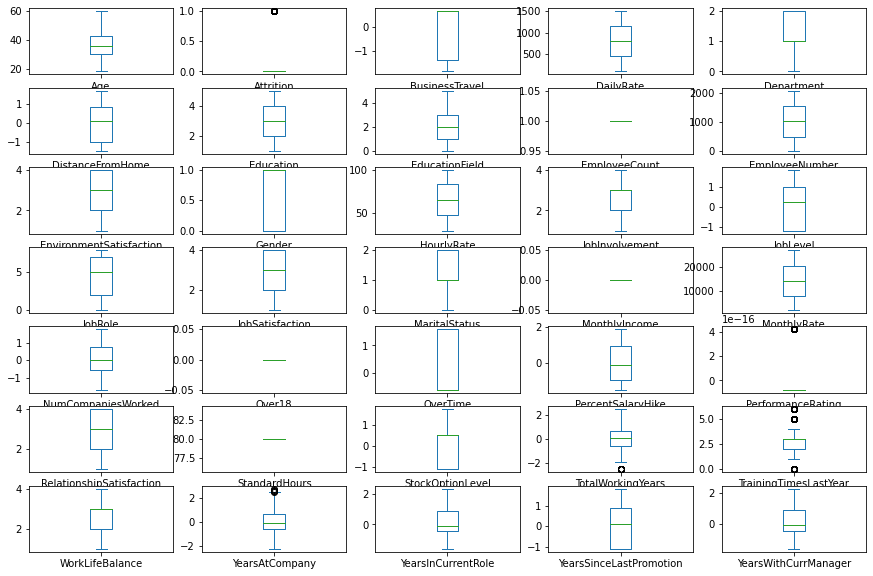

In [48]:
df.plot(kind='box',subplots=True,layout=(7,5),figsize=(15,10))


In [49]:
# we can now scale the data using standard scaler
from sklearn.preprocessing import StandardScaler


In [50]:
x=df.drop(['Attrition'],axis=1)
x.sample()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
436,33,0.635468,587,1,0.479509,1,3,1,584,1,...,1,80,1.785018,-0.244305,2,3,-0.30528,-0.089615,0.096854,-0.053


In [51]:
y=df['Attrition']
y


0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [52]:
y.shape,x.shape


((1470,), (1470, 34))

In [53]:
scale=StandardScaler()
x = pd.DataFrame(scale.fit_transform(x), columns=x.columns)


In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [55]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif["Features"]=x.columns
    print(vif)


In [56]:
vif_calc()


    VIF Factor                  Features
0     2.045707                       Age
1     1.012763            BusinessTravel
2     1.023926                 DailyRate
3     2.013827                Department
4     1.012683          DistanceFromHome
5     1.066044                 Education
6     1.017798            EducationField
7          NaN             EmployeeCount
8     1.024452            EmployeeNumber
9     1.020304   EnvironmentSatisfaction
10    1.021627                    Gender
11    1.022580                HourlyRate
12    1.020135            JobInvolvement
13    2.482787                  JobLevel
14    1.918688                   JobRole
15    1.022857           JobSatisfaction
16    2.306792             MaritalStatus
17         NaN             MonthlyIncome
18    1.019820               MonthlyRate
19    1.417109        NumCompaniesWorked
20         NaN                    Over18
21    1.029674                  OverTime
22    1.767989         PercentSalaryHike
23    1.754967  

We can see that multicolinearity is not present in the data, However the column the column EmployeeNumber doesn't make any impact on Attrition rate hence the column can be dropped



In [57]:
x.drop(['EmployeeNumber'],axis=1,inplace=True)
x.shape


(1470, 33)

In [58]:
y.value_counts()


0    1233
1     237
Name: Attrition, dtype: int64

data analysis by splitting the data

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)


In [60]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((1102, 33), (368, 33), (1102,), (368,))

choose the best model

In [61]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rf=RandomForestClassifier()


In [62]:
model=[lg,gnb,svc,dtc,knn,rf]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of ",m,"is : ")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')


Accuracy score of  LogisticRegression() is : 
0.8885869565217391
[[311   9]
 [ 32  16]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       320
           1       0.64      0.33      0.44        48

    accuracy                           0.89       368
   macro avg       0.77      0.65      0.69       368
weighted avg       0.87      0.89      0.87       368



Accuracy score of  GaussianNB() is : 
0.8206521739130435
[[282  38]
 [ 28  20]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       320
           1       0.34      0.42      0.38        48

    accuracy                           0.82       368
   macro avg       0.63      0.65      0.64       368
weighted avg       0.84      0.82      0.83       368



Accuracy score of  SVC() is : 
0.875
[[318   2]
 [ 44   4]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
     

From the above matix we can observe that LogisticRegression() is giving 88.8% score and RandomForestClassifier() is giving 88.3% accuracy score score



In [64]:
from sklearn.model_selection import cross_val_score


In [65]:
for m in model:
    score=cross_val_score(m,x_train,y_train,cv=5)
    print("Score of : ",m )
    print(score*100)
    print(score.mean()*100)
    print(score.std()*100)
    print('\n')


Score of :  LogisticRegression()
[86.87782805 88.68778281 85.         83.63636364 85.45454545]
85.93130399012752
1.7236856043883027


Score of :  GaussianNB()
[82.35294118 80.54298643 80.90909091 78.63636364 82.27272727]
80.94282188399833
1.3592527787519186


Score of :  SVC()
[84.61538462 86.87782805 85.         85.45454545 85.45454545]
85.48046071575484
0.7659213848916231


Score of :  DecisionTreeClassifier()
[76.92307692 77.8280543  80.90909091 80.90909091 78.18181818]
78.9502262443439
1.651263561432618


Score of :  KNeighborsClassifier()
[83.71040724 82.80542986 85.90909091 82.27272727 85.        ]
83.9395310571781
1.3506056777824285


Score of :  RandomForestClassifier()
[84.61538462 84.61538462 84.54545455 84.54545455 85.90909091]
84.84615384615385
0.5323878688300514




LogisticRegression() and randomforestclassifier() model is giving the best score for cross validation



In [66]:
# Parameter tuning

from sklearn.model_selection import GridSearchCV


In [67]:
rf=RandomForestClassifier()
params={'criterion':['gini','entropy','log_loss']}


In [68]:
grd=GridSearchCV(estimator=rf,param_grid=params,cv=5)


In [69]:
grd.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss']})

In [70]:
grd.best_score_


0.8548004936240231

In [71]:
grd.best_params_


{'criterion': 'gini'}

In [72]:
rf=RandomForestClassifier(criterion='gini')
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


0.875
[[318   2]
 [ 44   4]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.67      0.08      0.15        48

    accuracy                           0.88       368
   macro avg       0.77      0.54      0.54       368
weighted avg       0.85      0.88      0.83       368



RandomForestClassifier with criterion='gini' gives the better score (87.5%) than that of Logistic Regression and we can choose this to be our best model



In [73]:
# Saving the best model

final_classifier=RandomForestClassifier(criterion='gini')
final_classifier.fit(x_train,y_train)
pred=final_classifier.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


0.875
[[317   3]
 [ 43   5]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.62      0.10      0.18        48

    accuracy                           0.88       368
   macro avg       0.75      0.55      0.56       368
weighted avg       0.85      0.88      0.83       368



In [74]:
# We can save the model now
import joblib
joblib.dump(final_classifier,'HR_Analytics_finalmodel.obj')


['HR_Analytics_finalmodel.obj']

Loading the saved model and predicting the values



In [75]:
Attrition_prediction=joblib.load('HR_Analytics_finalmodel.obj')


In [76]:
pred=Attrition_prediction.predict(x_test)
print("Predicted values :",pred)


Predicted values : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [77]:
y_test


1041    0
184     0
1222    1
67      0
220     0
       ..
571     0
1163    0
243     0
1411    0
1370    0
Name: Attrition, Length: 368, dtype: int32

In [78]:
# Making a DataFrame of Predicted values and Original values
df1=pd.DataFrame({'Predicted values':pred,'Original values':y_test})
df1


,Predicted values,Original values
1041,0,0
184,0,0
1222,0,1
67,0,0
220,0,0
...,...,...
571,0,0
1163,0,0
243,0,0
1411,0,0


We can see that the Original values and Predicted values are almost similar for the model with the accuracy score 87%